<a href="https://colab.research.google.com/github/kridtapon/Forecasted-Momentum-Oscillator-FMO-Strategy/blob/main/Forecasted_Momentum_Oscillator_(FMO)_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate the Chande Forecast Oscillator (CFO)
def calculate_cfo(df, period=10):
    """
    Calculate the Chande Forecast Oscillator (CFO).
    """
    high_rolling = df['High'].rolling(window=period).max()
    low_rolling = df['Low'].rolling(window=period).min()

    # Forecast values
    forecast = 100 * (df['Close'] - low_rolling) / (high_rolling - low_rolling) - 50

    return forecast

# Function to calculate the MACD and its signal line
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate the MACD and Signal line.
    """
    fast_ema = df['Close'].ewm(span=fast_period, adjust=False).mean()
    slow_ema = df['Close'].ewm(span=slow_period, adjust=False).mean()

    macd = fast_ema - slow_ema
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()

    return macd, macd_signal

# Define the stock symbol and time period
symbol = 'AJG'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate the Chande Forecast Oscillator (CFO)
df['CFO'] = calculate_cfo(df, period=10)

# Calculate the MACD and Signal line
df['MACD'], df['MACD_Signal'] = calculate_macd(df, fast_period=16, slow_period=32, signal_period=11)

# Calculate the Moving Average of Oscillator (OSMA)
df['OSMA'] = df['MACD'] - df['MACD_Signal']

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on the CFO and OSMA
df['Entry'] = (df['CFO'] > 0) & (df['OSMA'] > 0)
df['Exit'] = (df['CFO'] < 0) & (df['OSMA'] < 0)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                   239790.73453
Total Return [%]                              139.790735
Benchmark Return [%]                          216.004716
Max Gross Exposure [%]                             100.0
Total Fees Paid                             12920.592537
Max Drawdown [%]                               17.862647
Max Drawdown Duration                  137 days 00:00:00
Total Trades                                          35
Total Closed Trades                                   35
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   48.571429
Best Trade [%]                                  16.59814
Worst Trade [%]                

[*********************100%***********************]  1 of 1 completed


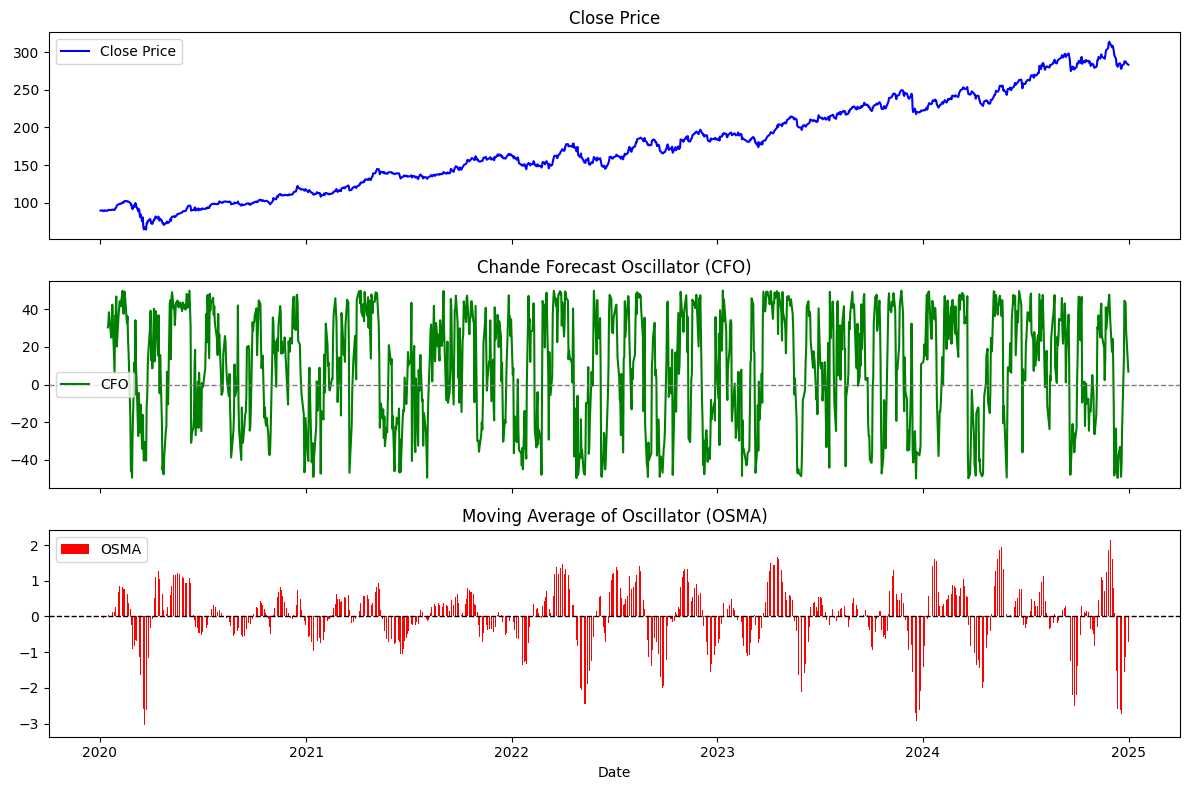

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

def calculate_cfo(df, period=14):
    high_rolling = df['High'].rolling(window=period).max()
    low_rolling = df['Low'].rolling(window=period).min()
    forecast = 100 * (df['Close'] - low_rolling) / (high_rolling - low_rolling) - 50
    return forecast

def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    fast_ema = df['Close'].ewm(span=fast_period, adjust=False).mean()
    slow_ema = df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd = fast_ema - slow_ema
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Download stock data
symbol = 'AJG'
start_date = '2020-01-01'
end_date = '2025-01-01'

df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

df['CFO'] = calculate_cfo(df, period=10)
df['MACD'], df['MACD_Signal'] = calculate_macd(df, fast_period=16, slow_period=32, signal_period=11)
df['OSMA'] = df['MACD'] - df['MACD_Signal']

# Plot the data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)

# Plot Close Price
axes[0].plot(df.index, df['Close'], label='Close Price', color='blue')
axes[0].set_title('Close Price')
axes[0].legend()

# Plot CFO
axes[1].plot(df.index, df['CFO'], label='CFO', color='green')
axes[1].axhline(0, linestyle='--', color='gray', linewidth=1)
axes[1].set_title('Chande Forecast Oscillator (CFO)')
axes[1].legend()

# Plot OSMA
axes[2].bar(df.index, df['OSMA'], label='OSMA', color='red')
axes[2].axhline(0, linestyle='--', color='black', linewidth=1)
axes[2].set_title('Moving Average of Oscillator (OSMA)')
axes[2].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools

# Function to calculate the Chande Forecast Oscillator (CFO)
def calculate_cfo(df, period):
    high_rolling = df['High'].rolling(window=period).max()
    low_rolling = df['Low'].rolling(window=period).min()
    forecast = 100 * (df['Close'] - low_rolling) / (high_rolling - low_rolling) - 50
    return forecast

# Function to calculate MACD and Signal Line
def calculate_macd(df, fast_period, slow_period, signal_period):
    fast_ema = df['Close'].ewm(span=fast_period, adjust=False).mean()
    slow_ema = df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd = fast_ema - slow_ema
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Download stock data
symbol = 'AJG'
start_date = '2019-01-01'
end_date = '2025-01-01'
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define parameter ranges for optimization
cfo_periods = [10, 14, 20]
macd_fast_periods = [8, 12, 16]
macd_slow_periods = [20, 26, 32]
macd_signal_periods = [7, 9, 11]

# Create parameter combinations using itertools
param_combinations = list(itertools.product(cfo_periods, macd_fast_periods, macd_slow_periods, macd_signal_periods))

# Optimize strategy
results = []
for cfo_period, macd_fast, macd_slow, macd_signal in param_combinations:
    df['CFO'] = calculate_cfo(df, cfo_period)
    df['MACD'], df['MACD_Signal'] = calculate_macd(df, macd_fast, macd_slow, macd_signal)
    df['OSMA'] = df['MACD'] - df['MACD_Signal']

    df['Entry'] = (df['CFO'] > 0) & (df['OSMA'] > 0)
    df['Exit'] = (df['CFO'] < 0) & (df['OSMA'] < 0)

    portfolio = vbt.Portfolio.from_signals(
        close=df['Close'],
        entries=df['Entry'],
        exits=df['Exit'],
        init_cash=100_000,
        fees=0.001,
        slippage=0.001,
        freq='D'
    )

    results.append({
        'CFO_Period': cfo_period,
        'MACD_Fast': macd_fast,
        'MACD_Slow': macd_slow,
        'MACD_Signal': macd_signal,
        'Final_Equity': portfolio.final_value()  # Fix: Call method with parentheses
    })

# Convert results to DataFrame and find the best combination
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['Final_Equity'].idxmax()]
print("Best Parameters:")
print(best_params)


[*********************100%***********************]  1 of 1 completed


Best Parameters:
CFO_Period          10.000000
MACD_Fast           16.000000
MACD_Slow           32.000000
MACD_Signal         11.000000
Final_Equity    267278.434835
Name: 26, dtype: float64
